# Multilayer Perceptron

Low-level implementation of neural network in Python.

## Compliance tests

### Classification

First test was conducted on data.simple dataset.

In [1]:
from Perceptron import *
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=[3],
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.1,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
mlp.load("data\data.simple.train.10000.csv")
mlp.train()
mlp.test_classification("data\data.simple.test.10000.csv")

Success ratio: 0.9936


The model trained during just one epoch turns out to achieve extremely good results. Thats is caused by the fact, that the data set is indeed simple and almost linearly separable.

C:\Users\Potato\Desktop\studia\dl\MultilayerPerceptron - Copy\Perceptron.py:275: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xm, ym, res,


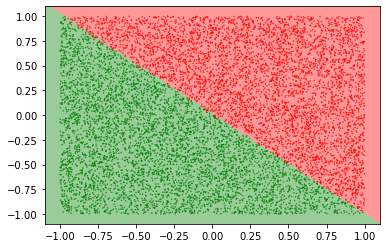

In [2]:
draw_classification(mlp, "data\data.simple.test.10000.csv")

Next test was conducted on **data.three_gauss** dataset.  **SM_CE** flag set as **True** means that provided final activation function and loss function will be ignored and **Softmax** activation with **Cross entropy** loss will be used instead. This combination is used due to simplified derivative of this composite $$\frac{\partial E}{\partial y_j}=predicted_j-actual_j$$ 

In [3]:
np.random.seed(1)
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=[3],
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     SM_CE=True,
                     batch_size=3,
                     learning_rate=0.1,
                     momentum=0.1,
                     epochs=10,
                     bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")

Success ratio: 0.9330333333333334


In this case model achieves satisfactory results. As we can see on the image below all three sets intersect with each other in proximity of point (0,0).

C:\Users\Potato\Desktop\studia\dl\MultilayerPerceptron - Copy\Perceptron.py:275: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xm, ym, res,


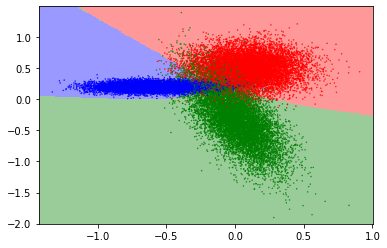

In [4]:
draw_classification(mlp, "data\data.three_gauss.test.10000.csv")

## Regression

We tested the regression funcinality with custom generated dataset from function $y=x^2$.

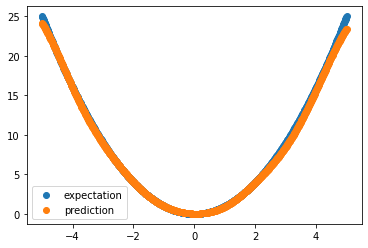

In [5]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=30,
                 bias=True)

mlp.load("data\quadratic1_train.csv")
mlp.train()
draw_regression2d(mlp, x=np.linspace(-5, 5, 1000), func=lambda x: x**2)

The model converges and models the function accurately. By trial we deduced that it is important to use very low learning_rate value and low momentum in case of regression problem.

Three dimensional function $z=x^2+xy+5x-1$

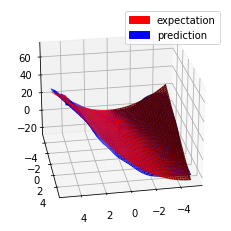

In [6]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[12],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=30,
                 bias=True)

mlp.load("data\\3d_train.csv")
mlp.train()
draw_regression3d(mlp,
                  x=np.linspace(-5, 5, 50),
                  y=np.linspace(-5, 5, 50),
                  func=lambda x, y:  x**2+x*y+5*x-1)

## Activation function analysis

We will test different activation functions in classification of three_gauss set of data. Rest of the parameters will be the same.

Success ratio: 0.9261


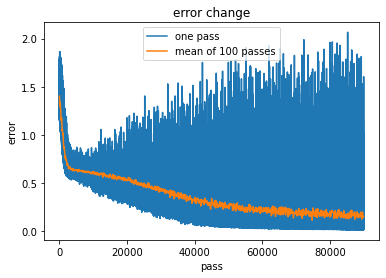

Last mean error: 0.14687314018552072


In [7]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

Success ratio: 0.9305666666666667


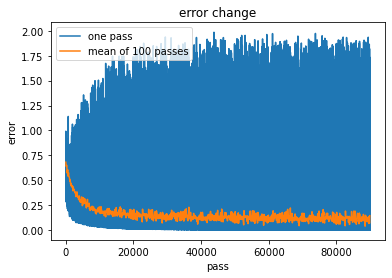

Last mean error: 0.1439369877670605


In [8]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=tanh,
                 dActivation=dTanh,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

We can see that in this case usage of tanh activation allows us to converge faster as there is a visible dip in sigmoid's learning curve. Furthermore the success ratio seems to be pretty similar.

Both previous cases were tested with Mean Squared Error loss function. We would see model would behave with Softmax + Cross Entropy coombination.

Success ratio: 0.9285666666666667


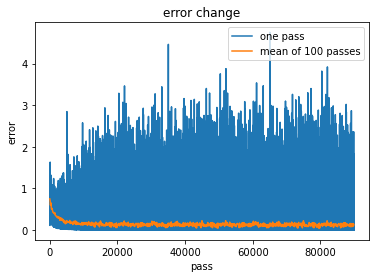

Last mean error: 0.12139571576751804


In [9]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=tanh,
                 dActivation=dTanh,
                 SM_CE=True,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

In this case model conversion proceeds visibly faster and allows us to achieve slightly better results.

We will test different activation functions in regression of function $y=x^2-3x-5$. Output layer function is identity.

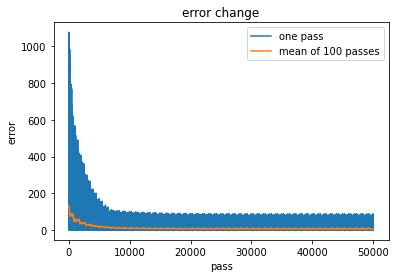

Last mean error: 4.888230510416647


In [10]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

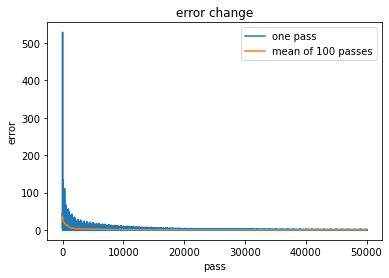

Last mean error: 0.06635346803204847


In [11]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=ReLU,
                 dActivation=dReLU,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

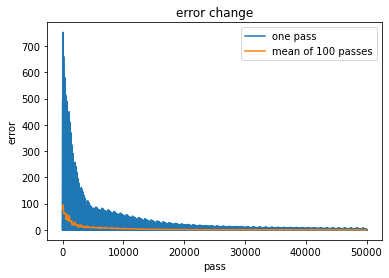

Last mean error: 0.0758238827180182


In [12]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=tanh,
                 dActivation=dTanh,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

## Number of layers analysis

We will try various number of layers with 3 neurons each. Rest of parameters will remain the same.

0 hidden layers, last mean error: 0.007083063373269101


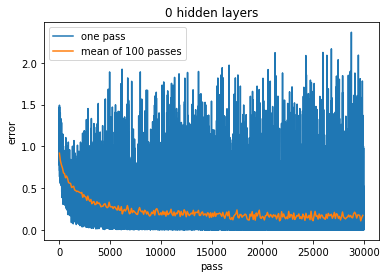

1 hidden layer, last mean error: 0.00562800728321467


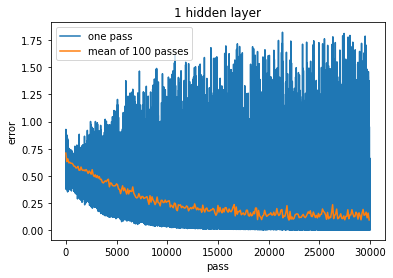

2 hidden layers, last mean error: 0.03649567866715629


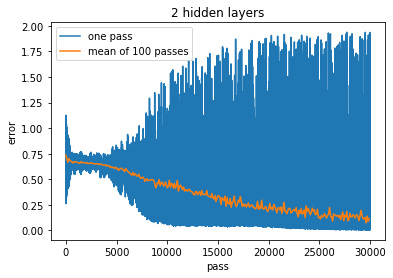

3 hidden layers, last mean error: 0.42898049252847215


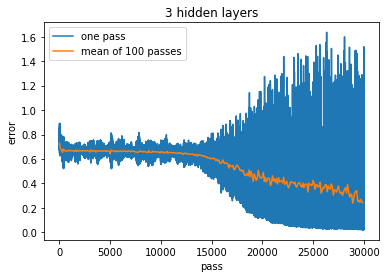

4 hidden layers, last mean error: 0.5006853070523627


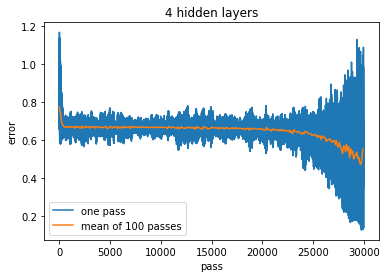

5 hidden layers, last mean error: 0.5798768928482773


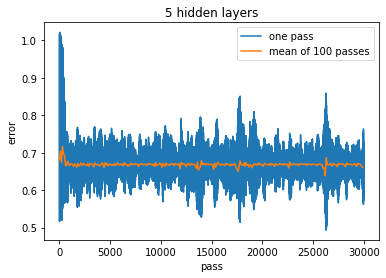

In [13]:
layers = [[],
          [3],
          [3, 3],
          [3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3, 3]]
for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.05,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
    mlp.load("data\data.three_gauss.train.10000.csv")
    losses = mlp.train()
    st = f'{ind} hidden layers' if ind != 1 else f'{ind} hidden layer'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

We will try various number of neurons (1, 2, 4, 8, ... 512) in one hidden layer. 

1 neuron, last mean error: 0.5688629994534196


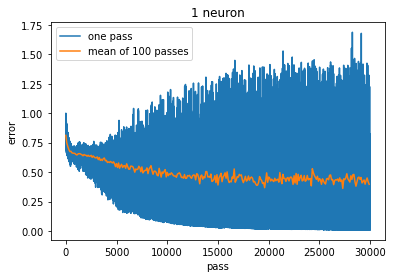

2 neurons, last mean error: 0.014378950266145298


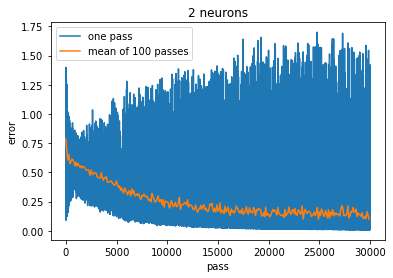

4 neurons, last mean error: 0.045926438933706154


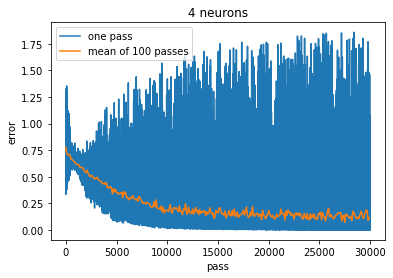

8 neurons, last mean error: 0.04111459116876064


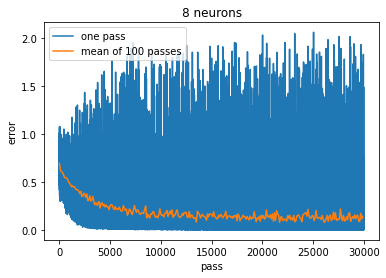

16 neurons, last mean error: 0.22443438673635405


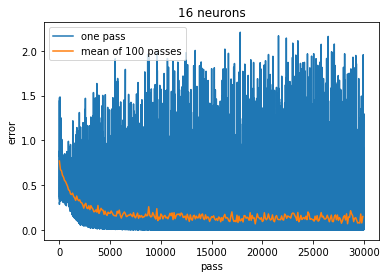

32 neurons, last mean error: 0.025007571713045514


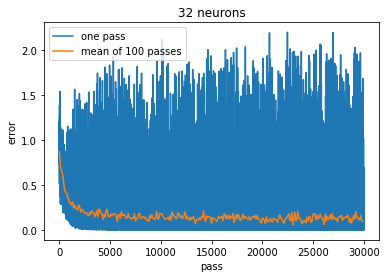

64 neurons, last mean error: 0.005972775688789495


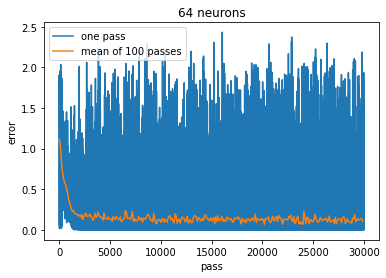

128 neurons, last mean error: 0.00855652880166343


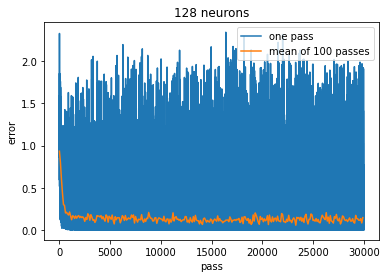

256 neurons, last mean error: 1.0001373976626273


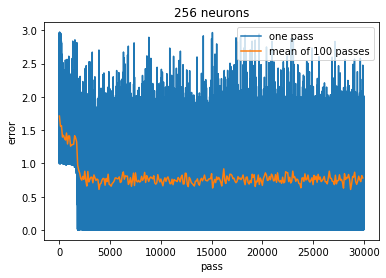

512 neurons, last mean error: 0.002782370489661183


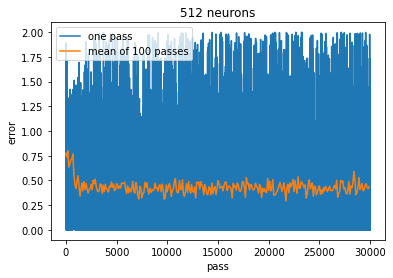

In [14]:
layers = [[1],
          [2],
          [4],
          [8],
          [16],
          [32],
          [64],
          [128],
          [256],
          [512]]

for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.05,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
    mlp.load("data\data.three_gauss.train.10000.csv")
    losses = mlp.train()
    st = f'{2 ** ind} neurons' if ind != 0 else f'{2 ** ind} neuron'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

## Loss function comparison

We will compare 3 loss functions: MSE (mean squared error), MAE (mean absolute error) and combination of Softmax activation with Cross entropy.

Success ratio: 0.9225


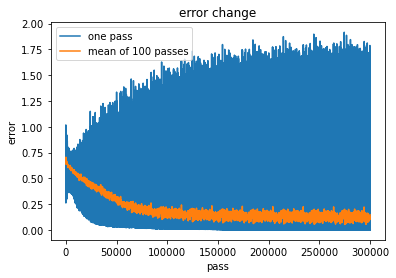

Last mean error: 0.14823772889041031


In [19]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 loss=MSE,
                 dLoss=dMSE,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

Success ratio: 0.615


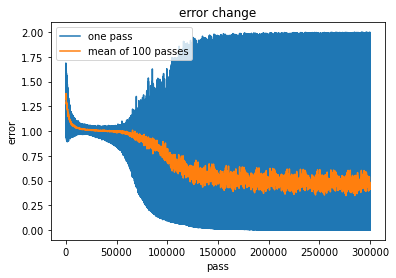

Last mean error: 0.4136122951756897


In [20]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 loss=MAE,
                 dLoss=dMAE,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

Success ratio: 0.9293


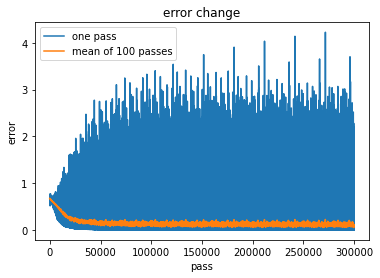

Last mean error: 0.10285714915369722


In [21]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 SM_CE=True,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=10,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)